# Place Detection Training

## Install Dependencies

In [1]:
# clone YOLOv5 Repository
# !git clone https://github.com/ultralytics/yolov5
!pwd
%cd yolov5

/home/nattkorat/Desktop/klpr-training
/home/nattkorat/Desktop/klpr-training/yolov5


In [ ]:
# install requirements of yolov5
# %cd yolov5
# !pip install -r requirements.txt

In [ ]:
# add configure to ClearMl for visualizing the Training Process
# !pip install clearml
# !clearml-init

### Display Dataset for Training

In the datasets, There are 1,584 images annotated and split into 3 categories such as 990 for training set, 228 for validation set, and 306 for testing set. The dataset is prepared follow as the format of YOLOv5 which all annotated store in txt file using the same name corespond to the image's name.

There is already having a configure file .yalm which store the meta data about the datasets for training and testing the model.

In [2]:
import os

def get_image_filenames(dataset_dir, limit = 5):
    image_filenames = []
    i = 0
    for dirpath, dirnames, filenames in os.walk(dataset_dir):
        for filename in filenames:
            i += 1
            if i > limit:
                break
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Add or change the file extensions as needed
                base_filename = os.path.basename(filename)
                image_filenames.append(base_filename)
    return image_filenames

def replace_extension_with_txt(filenames):
    # Make a copy of the list
    new_filenames = filenames.copy()

    # Replace the extension of each filename in the copy
    new_filenames = [os.path.splitext(filename)[0] + '.txt' for filename in new_filenames]

    return new_filenames

In [3]:
import cv2
from matplotlib import pyplot as plt

def plot_image_with_bboxes(ax, image_path, label_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Read the bounding box data
    with open(label_path, 'r') as f:
        bboxes = f.readlines()

    # Plot the bounding boxes on the image
    ax.imshow(img)

    for bbox in bboxes:
        bbox = bbox.strip().split()
        class_number, x_center, y_center, width, height = map(float, bbox)
        x_center *= w
        y_center *= h
        width *= w
        height *= h
        xmin = x_center - width/2
        ymin = y_center - height/2
        rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='green')
        ax.add_patch(rect)

    

#### Training Set


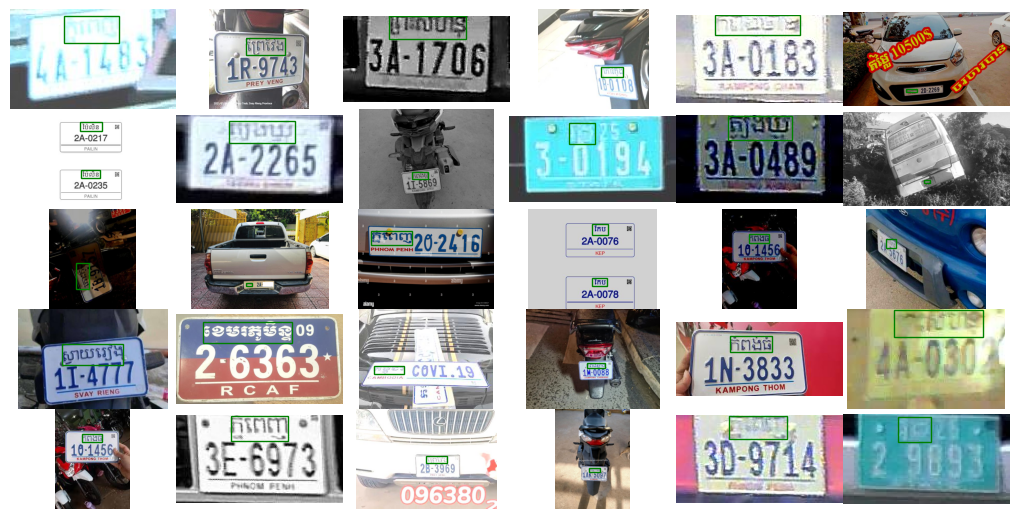

In [4]:
image_dir = '../v2_place_dataset/train/images/'
label_dir = '../v2_place_dataset/train/labels/'
image_filenames = get_image_filenames(image_dir, 30)

label_filenames = replace_extension_with_txt(image_filenames)

num_rows = 5
num_cols = 6

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(image_filenames)):
    img = os.path.join(image_dir, image_filenames[i])
    lb = os.path.join(label_dir, label_filenames[i])
    
    # plot the image
    plot_image_with_bboxes(axs[i // num_cols, i % num_cols], img, lb)
    
    # Remove axis
    axs[i // num_cols, i % num_cols].axis('off')

# Remove space between subplots and around them
plt.tight_layout(pad=0)
plt.show()

#### Validation Set

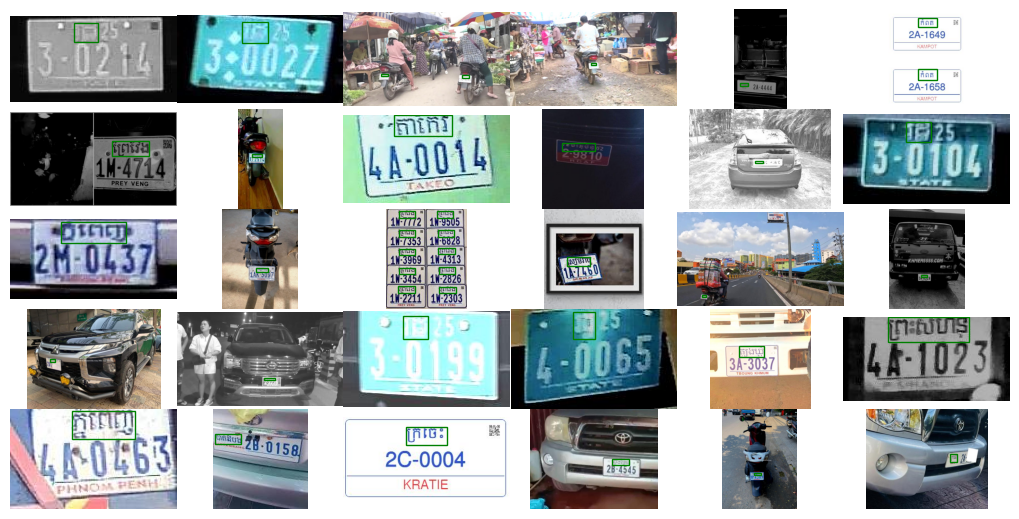

In [5]:
image_dir = '../v2_place_dataset/valid/images/'
label_dir = '../v2_place_dataset/valid/labels/'
image_filenames = get_image_filenames(image_dir, 30)

label_filenames = replace_extension_with_txt(image_filenames)

num_rows = 5
num_cols = 6

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(image_filenames)):
    img = os.path.join(image_dir, image_filenames[i])
    lb = os.path.join(label_dir, label_filenames[i])
    
    # plot the image
    plot_image_with_bboxes(axs[i // num_cols, i % num_cols], img, lb)
    
    # Remove axis
    axs[i // num_cols, i % num_cols].axis('off')

# Remove space between subplots and around them
plt.tight_layout(pad=0)
plt.show()

#### Testing Set

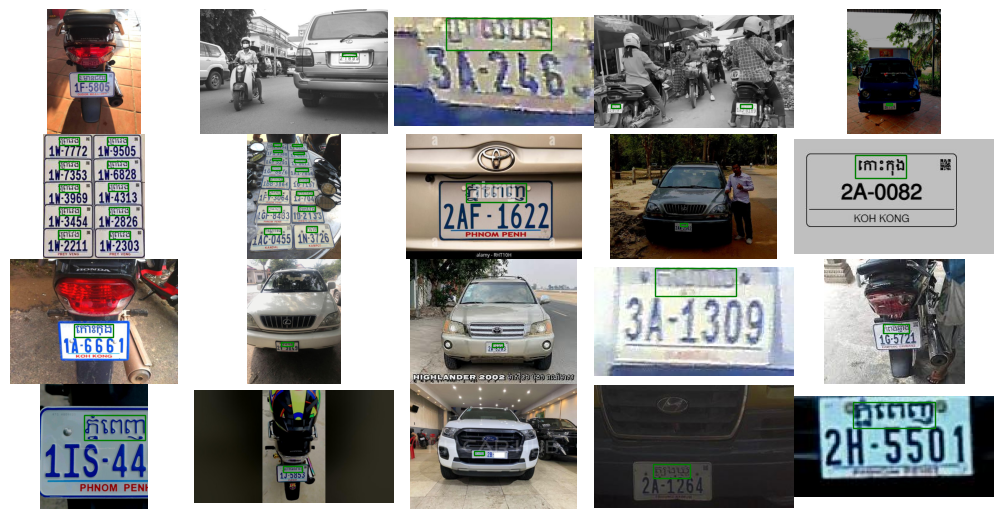

In [6]:
image_dir = '../v2_place_dataset/test/images/'
label_dir = '../v2_place_dataset/test/labels/'
image_filenames = get_image_filenames(image_dir, 20)

label_filenames = replace_extension_with_txt(image_filenames)

num_rows = 4
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5))
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(len(image_filenames)):
    img = os.path.join(image_dir, image_filenames[i])
    lb = os.path.join(label_dir, label_filenames[i])
    
    # plot the image
    plot_image_with_bboxes(axs[i // num_cols, i % num_cols], img, lb)
    
    # Remove axis
    axs[i // num_cols, i % num_cols].axis('off')

# Remove space between subplots and around them
plt.tight_layout(pad=0)
plt.show()

## Training Model

In [7]:
!python train.py --img 640 --epochs 100 --data ../v2_place_dataset/data.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=../v2_place_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.1.0.dev20230706+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12006MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

### Visualizing the Model

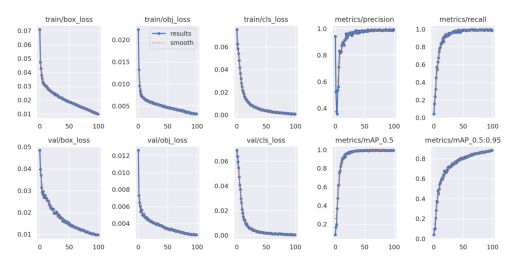

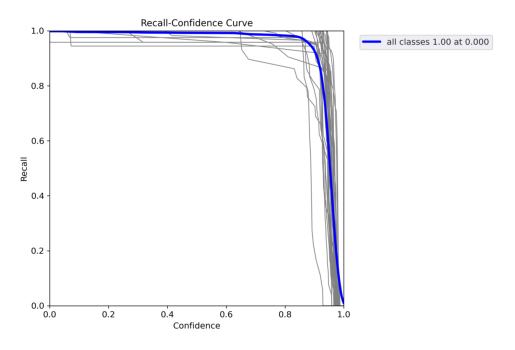

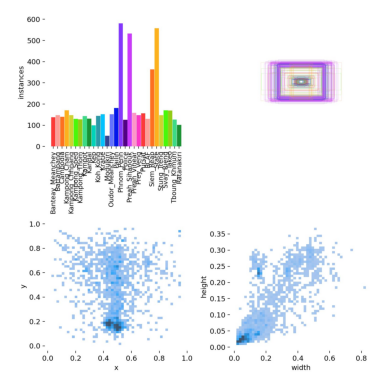

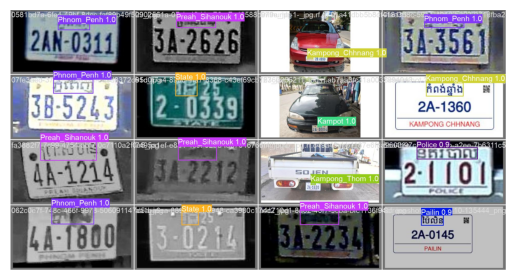

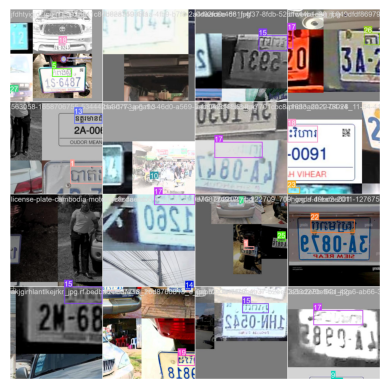

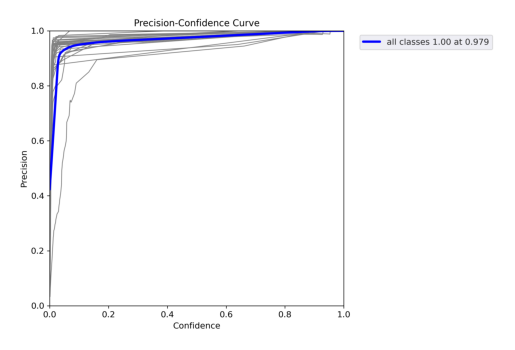

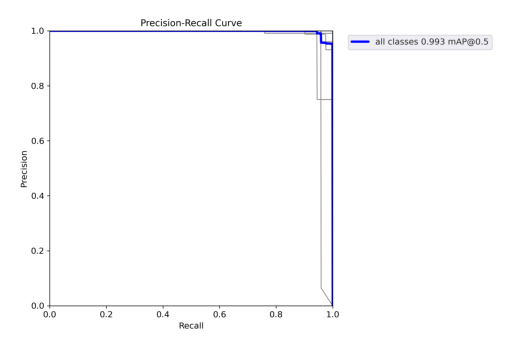

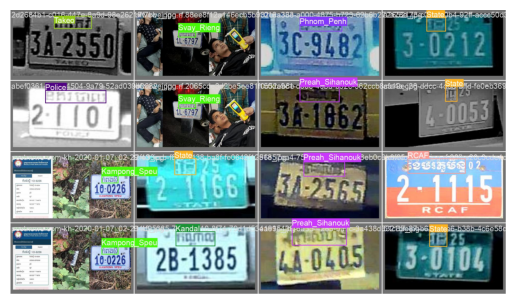

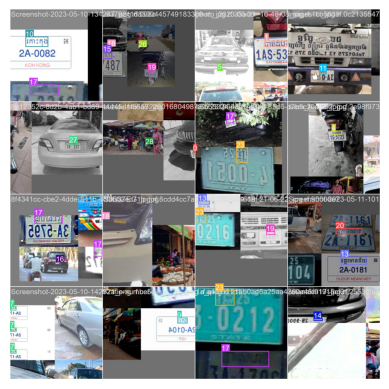

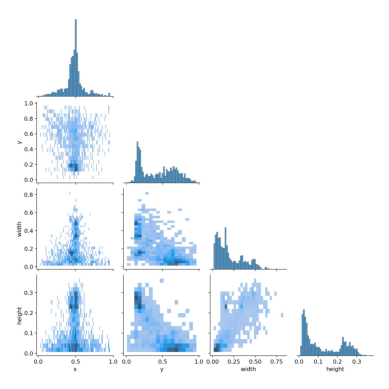

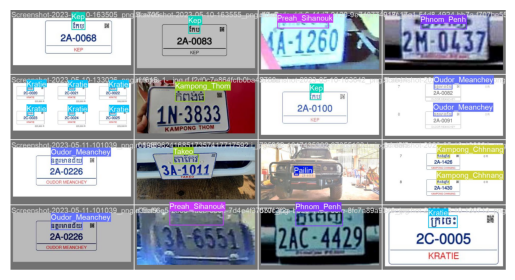

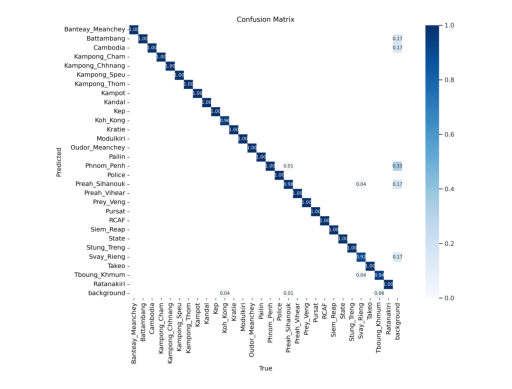

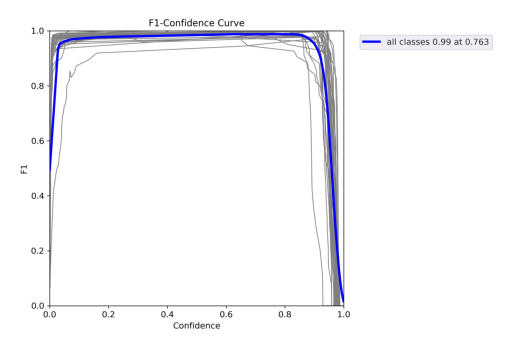

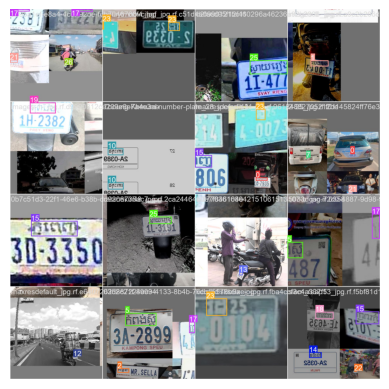

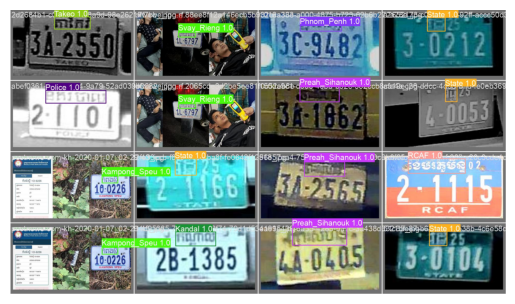

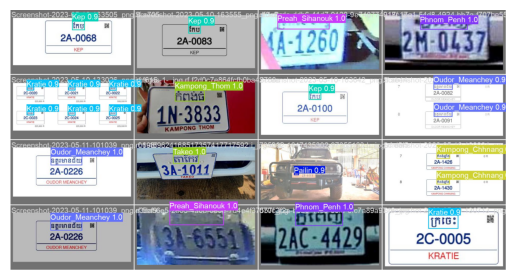

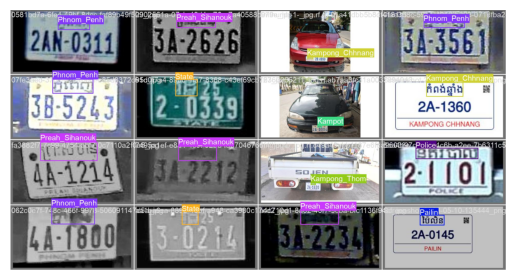

In [8]:
def visualize_images_in_folder(folder_path):
    # Get list of all image filenames (with .jpg, .jpeg, .png, .tif, or .bmp extensions)
    image_files = [f for f in os.listdir(folder_path)
                   if os.path.isfile(os.path.join(folder_path, f)) and 
                   f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp'))]

    # For each image, read and display it
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert color from BGR to RGB
        
        plt.figure()  # create a new figure for each image
        plt.imshow(img)
        plt.axis('off')  # no axis for this plot

    plt.show()

# Usage:
visualize_images_in_folder('runs/train/exp2')
    

### Evaluation the Model with the Testing Set

In [9]:
# Validate with testing set
!python val.py --task test --weights runs/train/exp2/weights/best.pt --data ../v2_place_dataset/data.yaml

val: data=../v2_place_dataset/data.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.1.0.dev20230706+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12006MiB)

Fusing layers... 
Model summary: 267 layers, 46259058 parameters, 0 gradients, 108.1 GFLOPs
test: Scanning /home/nattkorat/Desktop/klpr-training/v2_place_dataset/test/label
test: New cache created: /home/nattkorat/Desktop/klpr-training/v2_place_dataset/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        653       1018      0.987      0.995      0.995      0.879
      Banteay_Meanchey        653         22      0.985          1     

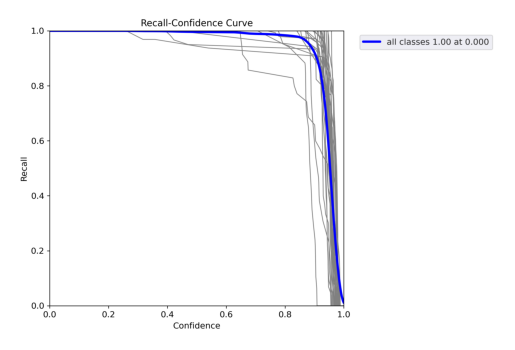

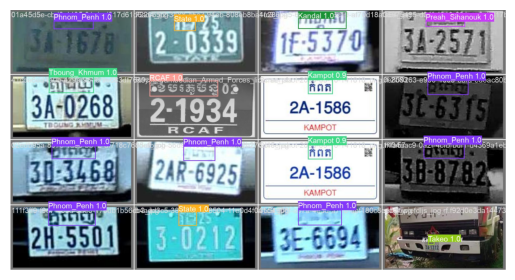

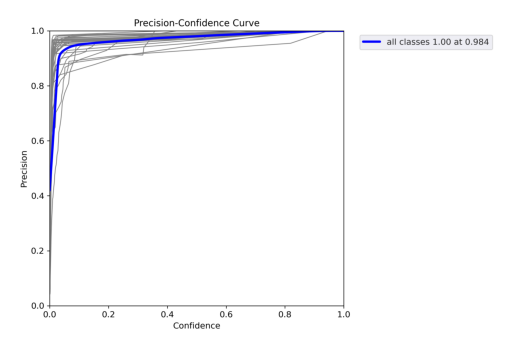

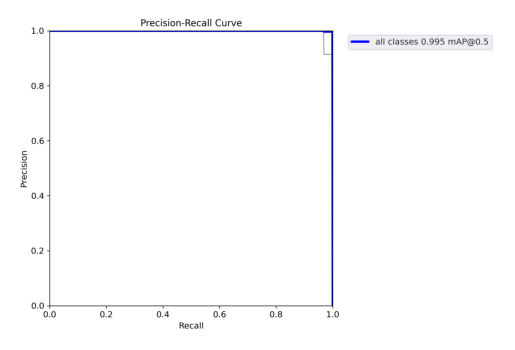

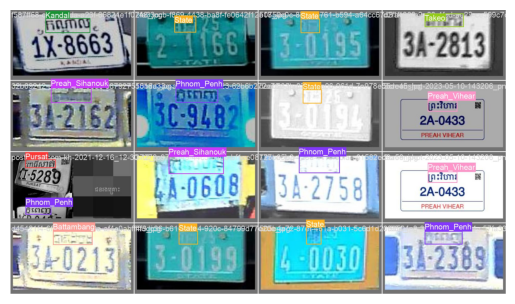

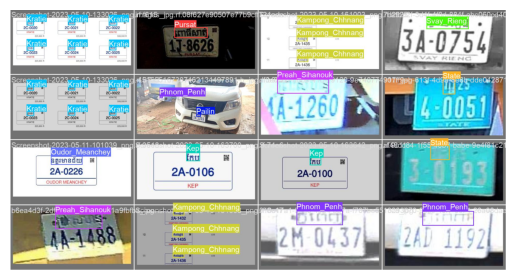

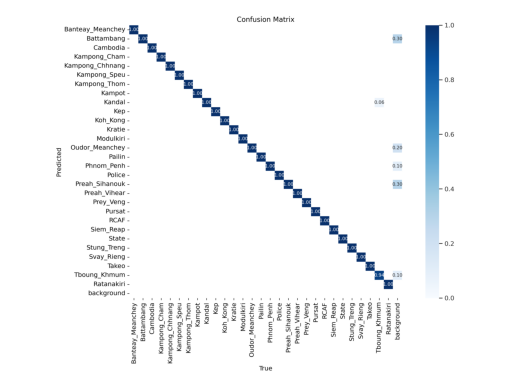

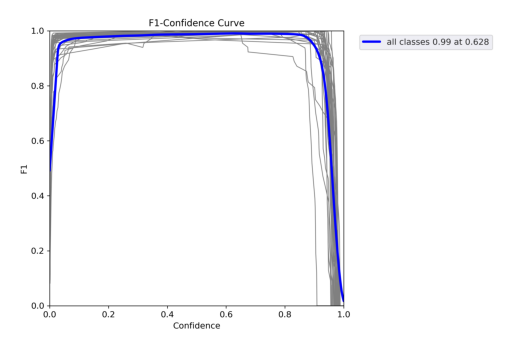

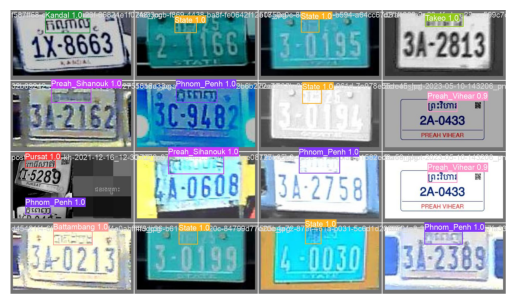

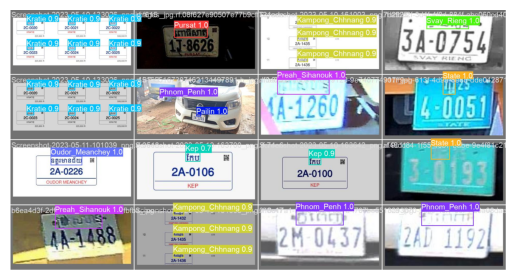

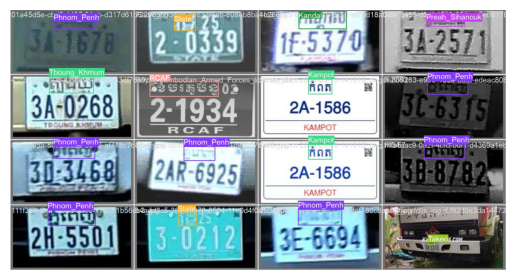

In [10]:
!ls runs/val/exp
visualize_images_in_folder('runs/val/exp4')